# Global Sea Surface Temperatures, Sea Ice Concentration and Wind Speed

![Map of global sea surface temperatures](images/sea_water_temperatures.png)

The **OSI-201-b** product, known as the **Global Metop Sea Surface Temperature (SST)**, is a Level 3C dataset produced by the Ocean and Sea Ice Satellite Application Facility (OSI SAF). It provides twice-daily global SST measurements derived from the Advanced Very High Resolution Radiometer (AVHRR) aboard the Metop-B satellite. These measurements are processed using a multispectral algorithm that utilises infrared channels at 3.7, 10.8, and 12.0 µm, along with a cloud mask to ensure data quality. Additional inputs from the European Centre for Medium-Range Weather Forecasts (ECMWF), including atmospheric temperature, humidity, and aerosol profiles, are incorporated to correct for regional and seasonal biases. The data is presented on a 0.05° regular grid in NetCDF4 format, compliant with the Group for High Resolution Sea Surface Temperature (GHRSST) Data Specification version 2. Regular validation is performed by comparing satellite estimates against buoy measurements, achieving a target accuracy with a monthly absolute mean difference of 0.5 K and a standard deviation of 0.8 K. This product is essential for operational meteorological services, oceanographic analyses, and environmental monitoring.

## Data characteristics
- **Spatial resolution**: 0.05° latitude × 0.05° longitude.  
- **Temporal coverage**: 2 products per day (00:00, 12:00) since 2016
- **Includes**: Sea surface temperatures, sea ice concentration, wind speed.
  
## Useful Links

- **Dataset Information Page**  
  https://osi-saf.eumetsat.int/products/osi-201-b
  
- **THREDDS Catalogue**
  - Human interface: https://tds0.ifremer.fr/thredds/catalog/OSI-201-b-metop_b/catalog.html
  - Machine interface: https://tds0.ifremer.fr/thredds/catalog/OSI-201-b-metop_b/catalog.xml


## Crediting the Data Providers

When using this dataset in publications or presentations, please provide the following citation:  

> OSI SAF Global Sea Surface Temperature (Metop-B/AVHRR) 2016-onwards, OSI-201-b, doi:10.15770/EUM_SAF_OSI_NRT_2011. EUMETSAT Ocean and Sea Ice Satellite Application Facility. Data extracted from [distributor/distribution mean]: ([extracted period],) ([extracted domains],) accessed [download date]

The content within square brackets "[…]" is to be replaced with whatever distributor, period, domain or download date is relevant to the data being used. The "extracted period" and "extracted domains" are only needed if a subset of the data is being used.
Suggestions for "distributor/distribution mean": OSI SAF FTP server/the EUMETSAT Data Centre/EUMETCast/name and URL of a redistributor...

## Exploring the data in Python



### Importing modules

In [1]:
import xarray as xr # For reading data from a NetCDF file
import matplotlib.pyplot as plt # For plotting the data
import cartopy.crs as ccrs # For plotting maps

### Opening and understanding the data

The data have been published in a series of CF-NetCDF files, one per timestamp, which are published twice a day daily. Whilst it is possible to directly download these data, we are not going to do that. The data are served over a THREDDS catalogue:

- Human interface: https://tds0.ifremer.fr/thredds/catalog/OSI-201-b-metop_b/catalog.html
- Machine interface: https://tds0.ifremer.fr/thredds/catalog/OSI-201-b-metop_b/catalog.xml

If you click on the human-interface above, you can navigate through the folders. The data are organised by year and then day of year. There are two files per day.

```
data
├── 2024
│ ├── 001
│ ├── 002
│ ├── 003
│ └── ...
├── 2025
│ ├── 001
│ ├── 002
│ └── ...
```

You will see that the data are served over OPeNDAP. OPeNDAP provides a way of streaming data over the internet so you don't have to download them to your own computer. You can copy the OPeNDAP Data URL and use it in your script in the same way that you would use a local filepath.

Let's start by loading in the data from a single file.

In [2]:
url = 'https://tds0.ifremer.fr/thredds/dodsC/OSI-201-b-metop_b/2025/040/20250209000000-OSISAF-L3C_GHRSST-SSTsubskin-AVHRR_SST_METOP_B_GLB-sstglb_metop01_20250209_000000-v02.0-fv01.0.nc'
xrds = xr.open_dataset(url)
xrds

<xarray.Dataset> Size: 3GB
Dimensions:                    (time: 1, lat: 3600, lon: 7200)
Coordinates:
  * time                       (time) datetime64[ns] 8B 2025-02-09
  * lat                        (lat) float32 14kB -89.97 -89.92 ... 89.92 89.97
  * lon                        (lon) float32 29kB -180.0 -179.9 ... 179.9 180.0
Data variables: (12/14)
    sea_surface_temperature    (time, lat, lon) float64 207MB ...
    sst_dtime                  (time, lat, lon) timedelta64[ns] 207MB ...
    sses_bias                  (time, lat, lon) float64 207MB ...
    sses_standard_deviation    (time, lat, lon) float64 207MB ...
    dt_analysis                (time, lat, lon) float64 207MB ...
    wind_speed                 (time, lat, lon) float64 207MB ...
    ...                         ...
    adi_dtime_from_sst         (time, lat, lon) float64 207MB ...
    sources_of_adi             (time, lat, lon) float32 104MB ...
    l2p_flags                  (time, lat, lon) int16 52MB ...
    quality_level              (time, lat, lon) float32 104MB ...
    satellite_zenith_angle     (time, lat, lon) float64 207MB ...
    solar_zenith_angle         (time, lat, lon) float64 207MB ...
Attributes: (12/47)
    Conventions:                CF-1.4
    title:                      Sea Surface Temperature
    summary:                    The GLB L3C product derived from METOP B AVHR...
    references:                 Low Earth Orbiter Sea Surface Temperature Pro...
    institution:                OSISAF
    history:                    METEO-FRANCE/CMS LEOSAFO processor
    ...                         ...
    project:                    Group for High Resolution Sea Surface Tempera...
    publisher_name:             The GHRSST Project Office
    publisher_url:              http://www.ghrsst.org
    publisher_email:            ghrsst-po@nceo.ac.uk
    processing_level:           L3C
    cdm_data_type:              grid

The OPeNDAP data access URL is predictable, a function of the date. Let's write something to access the data from any date of our choosing.

In [3]:
from datetime import datetime

desired_date = '20240201'  # YYYYMMDD
desired_time = '120000'  # hhmmss - must be 000000 or 120000

date_obj = datetime.strptime(desired_date, "%Y%m%d")
year = date_obj.year
day_of_year = f"{date_obj.timetuple().tm_yday:03d}"  # Ensure 3-digit format

print(f"Date: {desired_date}")
print(f"Year: {year}")
print(f"Day of Year: {day_of_year}")

url = f'https://tds0.ifremer.fr/thredds/dodsC/OSI-201-b-metop_b/{year}/{day_of_year}/{desired_date}{desired_time}-OSISAF-L3C_GHRSST-SSTsubskin-AVHRR_SST_METOP_B_GLB-sstglb_metop01_{desired_date}_{desired_time}-v02.0-fv01.0.nc'
xrds = xr.open_dataset(url)

xrds

Date: 20240201
Year: 2024
Day of Year: 032


<xarray.Dataset> Size: 3GB
Dimensions:                    (time: 1, lat: 3600, lon: 7200)
Coordinates:
  * time                       (time) datetime64[ns] 8B 2024-02-01T12:00:00
  * lat                        (lat) float32 14kB -89.97 -89.92 ... 89.92 89.97
  * lon                        (lon) float32 29kB -180.0 -179.9 ... 179.9 180.0
Data variables: (12/14)
    sea_surface_temperature    (time, lat, lon) float64 207MB ...
    sst_dtime                  (time, lat, lon) timedelta64[ns] 207MB ...
    sses_bias                  (time, lat, lon) float64 207MB ...
    sses_standard_deviation    (time, lat, lon) float64 207MB ...
    dt_analysis                (time, lat, lon) float64 207MB ...
    wind_speed                 (time, lat, lon) float64 207MB ...
    ...                         ...
    adi_dtime_from_sst         (time, lat, lon) float64 207MB ...
    sources_of_adi             (time, lat, lon) float32 104MB ...
    l2p_flags                  (time, lat, lon) int16 52MB ...
    quality_level              (time, lat, lon) float32 104MB ...
    satellite_zenith_angle     (time, lat, lon) float64 207MB ...
    solar_zenith_angle         (time, lat, lon) float64 207MB ...
Attributes: (12/47)
    Conventions:                CF-1.4
    title:                      Sea Surface Temperature
    summary:                    The GLB L3C product derived from METOP B AVHR...
    references:                 Low Earth Orbiter Sea Surface Temperature Pro...
    institution:                OSISAF
    history:                    METEO-FRANCE/CMS LEOSAFO processor
    ...                         ...
    project:                    Group for High Resolution Sea Surface Tempera...
    publisher_name:             The GHRSST Project Office
    publisher_url:              http://www.ghrsst.org
    publisher_email:            ghrsst-po@nceo.ac.uk
    processing_level:           L3C
    cdm_data_type:              grid

The data have 3 dimensions, `time`, `lat` and `lon`. However, since there is only one timeslice in each file, we can consider the data to be essentially 2D. Each variable has metadata associated it, and the dataset as a whole has 47 *global* attributes.

Let's have a look at the variable attributes for the `sea_surface_temperature` variable for example.

In [4]:
xrds['sea_surface_temperature'].attrs

{'long_name': 'sea surface subskin temperature',
 'standard_name': 'sea_surface_subskin_temperature',
 'units': 'kelvin',
 'valid_min': -300,
 'valid_max': 4500,
 'depth': '1 millimeter',
 'source': 'AVHRR_METOP_B',
 'comment': 'Temperature of the subskin of the ocean',
 '_ChunkSizes': array([   1, 1200, 2400], dtype=int32)}

The `standard_name` provides a standardised, machine-readable name for the variable. You can read a description for this variable in the Climate & Forecast (CF) standard name table found at:

https://cfconventions.org/Data/cf-standard-names/current/build/cf-standard-name-table.html

The data provider should have carefully read the description upon selecting the standard name, and the data user can also read the description, so the data user and provider share some common understanding about what the data are.

### Writing the data to a CSV file

You can write all or a subset of the data to a pandas dataframe that you can export as a CSV file.

In [5]:
df = xrds['sea_surface_temperature'].to_dataframe()
df.head()

sea_surface_temperature
time                lat        lon                                 
2024-02-01 12:00:00 -89.974609 -179.974609                      NaN
                               -179.924805                      NaN
                               -179.875000                      NaN
                               -179.825195                      NaN
                               -179.775391                      NaN

Or for a list of variables

In [6]:
df = xrds[['sea_surface_temperature', 'wind_speed', 'sea_ice_fraction']].to_dataframe()
df.head()

sea_surface_temperature  \
time                lat        lon                                    
2024-02-01 12:00:00 -89.974609 -179.974609                      NaN   
                               -179.924805                      NaN   
                               -179.875000                      NaN   
                               -179.825195                      NaN   
                               -179.775391                      NaN   

                                            wind_speed  sea_ice_fraction  
time                lat        lon                                        
2024-02-01 12:00:00 -89.974609 -179.974609         NaN               NaN  
                               -179.924805         NaN               NaN  
                               -179.875000         NaN               NaN  
                               -179.825195         NaN               NaN  
                               -179.775391         NaN               NaN

To write the dataframe to a CSV file:

In [7]:
df.to_csv('global_sea_surface_temperatures.csv')

### Converting from Kelvin to Celsius

The `sea_surface_temperature` values are stored in degrees kelvin.

In [8]:
xrds['sea_surface_temperature'].attrs['units']

'kelvin'

We can convert the data to celsius.

In [5]:
sst_celsius = xrds['sea_surface_temperature'] - 273.15

### Plotting the data for a day of our choosing

Let's use the code we used above to first isolate the data for a single day, then let's build on that to quickly plot the data.

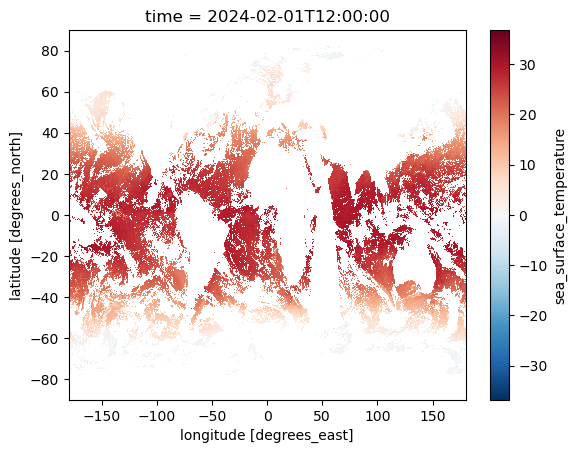

In [6]:
import matplotlib.pyplot as plt

desired_date = '20240201'  # YYYYMMDD
desired_time = '120000'  # hhmmss - must be 000000 or 120000

date_obj = datetime.strptime(desired_date, "%Y%m%d")
year = date_obj.year
day_of_year = f"{date_obj.timetuple().tm_yday:03d}"  # Ensure 3-digit format

url = f'https://tds0.ifremer.fr/thredds/dodsC/OSI-201-b-metop_b/{year}/{day_of_year}/{desired_date}{desired_time}-OSISAF-L3C_GHRSST-SSTsubskin-AVHRR_SST_METOP_B_GLB-sstglb_metop01_{desired_date}_{desired_time}-v02.0-fv01.0.nc'
xrds = xr.open_dataset(url)

sst_celsius = xrds['sea_surface_temperature'] - 273.15

sst_celsius.plot()
plt.show()

Without the coastlines these data are difficult to interpret. Let's add them, as well as different colours for the land and sea.

We should also choose a map projection.

- Map projections: https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html
- Matplotlib built-in colourmaps: https://matplotlib.org/stable/users/explain/colors/colormaps.html
- Colourmaps for oceanography from `cmocean`: https://matplotlib.org/cmocean/

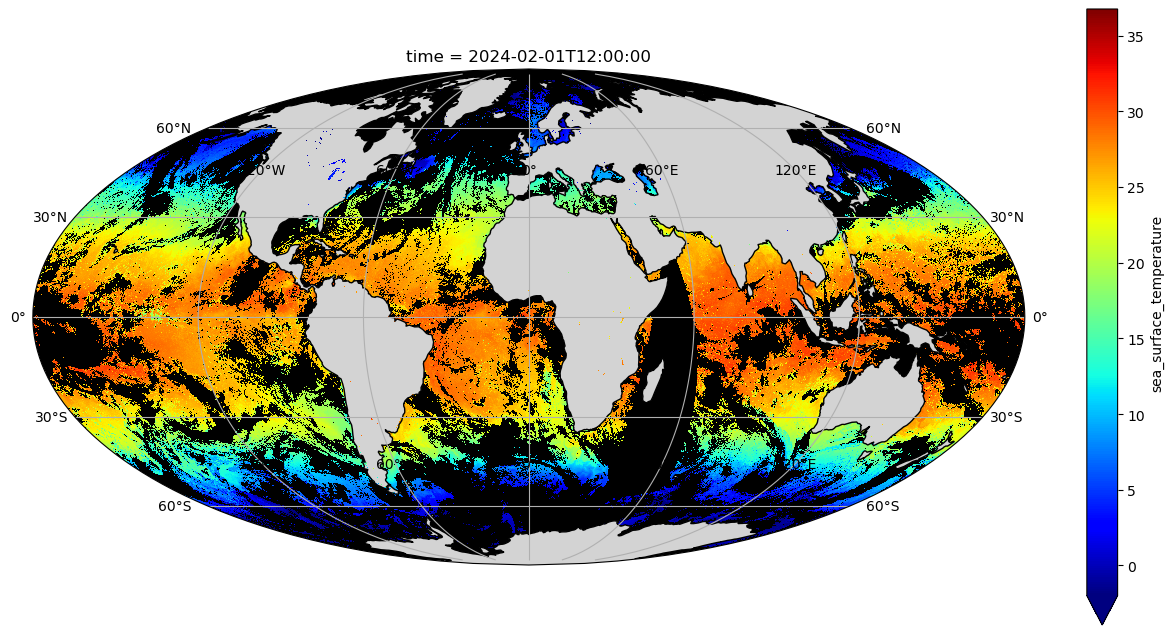

In [8]:
import cartopy.feature as cfeature

# Loading in the data
desired_date = '20240201'  # YYYYMMDD
desired_time = '120000'  # hhmmss - must be 000000 or 120000

date_obj = datetime.strptime(desired_date, "%Y%m%d")
year = date_obj.year
day_of_year = f"{date_obj.timetuple().tm_yday:03d}"  # Ensure 3-digit format

url = f'https://tds0.ifremer.fr/thredds/dodsC/OSI-201-b-metop_b/{year}/{day_of_year}/{desired_date}{desired_time}-OSISAF-L3C_GHRSST-SSTsubskin-AVHRR_SST_METOP_B_GLB-sstglb_metop01_{desired_date}_{desired_time}-v02.0-fv01.0.nc'
xrds = xr.open_dataset(url)

# Setting up the figure
projection = ccrs.Mollweide()
transform = ccrs.PlateCarree()

fig = plt.figure(figsize=(16, 8))
ax = plt.axes(projection=projection)

ax.add_feature(cfeature.OCEAN, zorder=0, facecolor='black')
ax.add_feature(cfeature.LAND, zorder=0, facecolor='lightgrey')
ax.gridlines(draw_labels=True)
ax.coastlines()

# Plotting the data
sst_celsius = xrds['sea_surface_temperature'] - 273.15
vmin = -2
vmax = sst_celsius.max()
sst_celsius.plot(ax=ax, transform=transform, cmap='jet', vmin=vmin, vmax=vmax)
plt.show()

### Interpolating the data to fill in the gaps

What if we want to interpolate the data to fill in the gaps? 

> **Note**: this should be done with caution!

You can do a basic 1D interpolation using the `interpolate_na` function in `xarray`.
https://docs.xarray.dev/en/stable/generated/xarray.DataArray.interpolate_na.html

Below I am selecting a linear interpolation, but other methods are available (see link above).

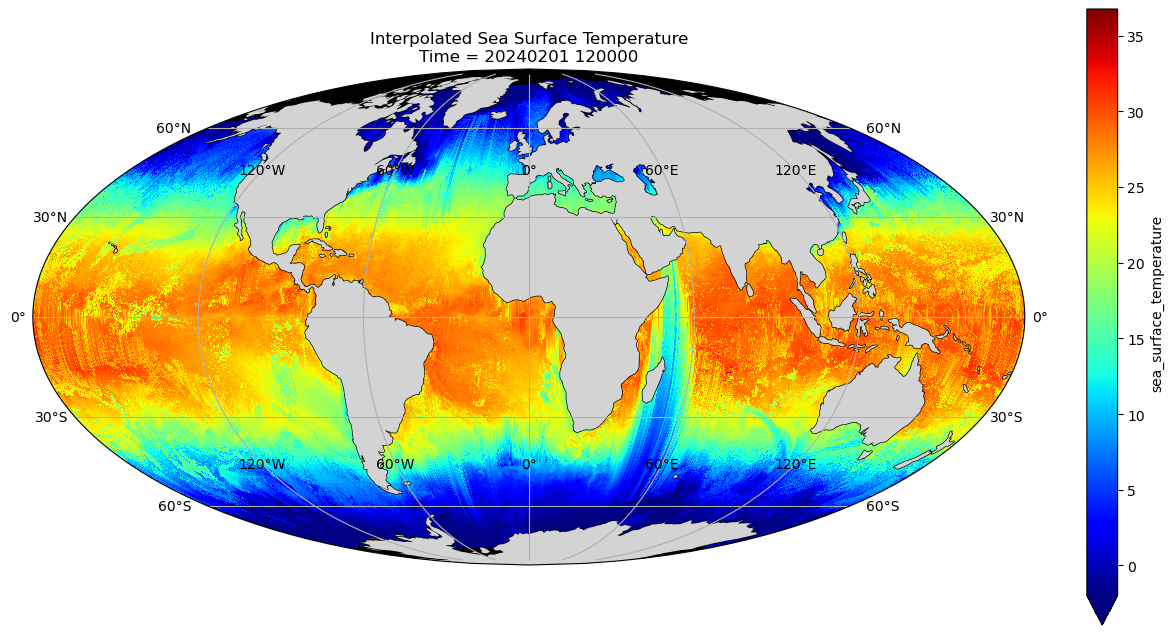

In [10]:
sst_celsius = xrds['sea_surface_temperature'] - 273.15
sst_filled = sst_celsius.interpolate_na(dim="lat", method="linear")
sst_filled = sst_filled.interpolate_na(dim="lon", method="linear")

fig = plt.figure(figsize=(16, 8))
ax = plt.axes(projection=ccrs.Mollweide())

ax.add_feature(cfeature.OCEAN, zorder=0, facecolor='black')
ax.add_feature(cfeature.LAND, zorder=2, facecolor='lightgrey')  # Land on top
ax.gridlines(draw_labels=True)
ax.coastlines()

vmin = -2
vmax = sst_celsius.max()
sst_filled.plot(ax=ax, transform=transform, cmap='jet', vmin=vmin, vmax=vmax, zorder=1)

plt.title(f"Interpolated Sea Surface Temperature\nTime = {desired_date} {desired_time}")
plt.show()

We may prefer to perform a 2D interpolation on the data. We can use `griddata` from `scipy` to do this.
https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.griddata.html

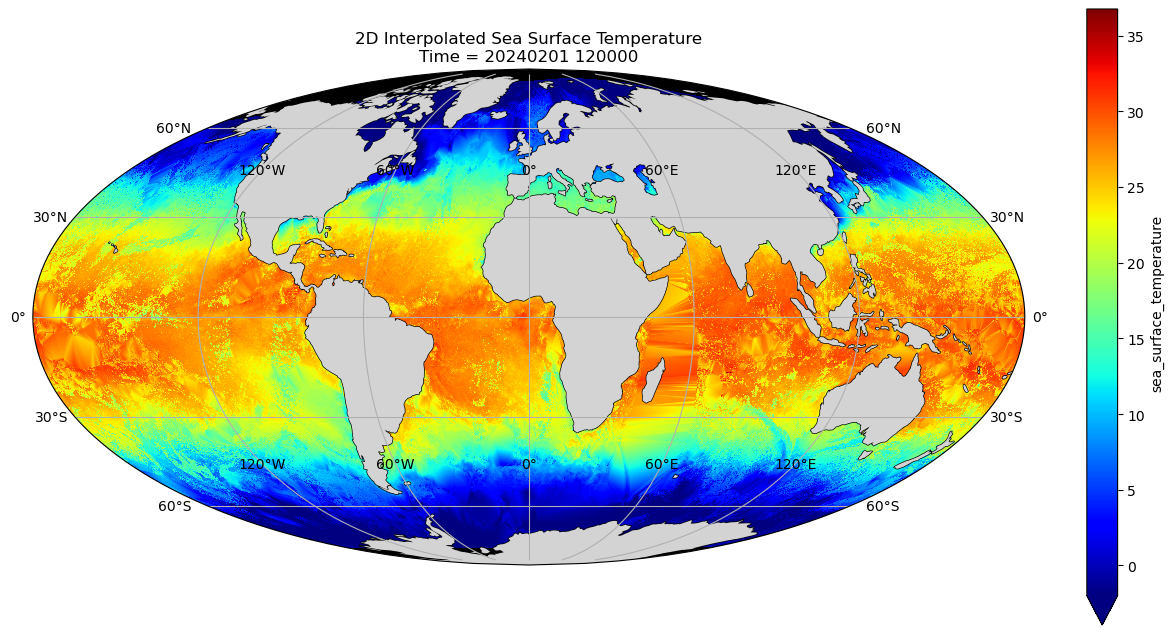

In [11]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from datetime import datetime
from scipy.interpolate import griddata

def interpolate_2d(data, lon, lat, method):

    # Create 2D coordinate arrays from the 1D lon and lat arrays
    lon2d, lat2d = np.meshgrid(lon, lat)
    
    # Flatten the coordinate arrays and data
    points = np.column_stack((lon2d.ravel(), lat2d.ravel()))
    values = data.ravel()
    
    # Identify valid (non-NaN) data
    mask = ~np.isnan(values)
    if np.sum(mask) < 3:
        # Not enough data to interpolate
        return data
    
    # Interpolate on the original grid
    grid_z = griddata(points[mask], values[mask], (lon2d, lat2d), method=method)
    return grid_z

# Load data
desired_date = '20240201'
desired_time = '120000'
date_obj = datetime.strptime(desired_date, "%Y%m%d")
year = date_obj.year
day_of_year = f"{date_obj.timetuple().tm_yday:03d}"

url = (
    f'https://tds0.ifremer.fr/thredds/dodsC/OSI-201-b-metop_b/{year}/{day_of_year}/'
    f'{desired_date}{desired_time}-OSISAF-L3C_GHRSST-SSTsubskin-AVHRR_SST_METOP_B_GLB-'
    f'sstglb_metop01_{desired_date}_{desired_time}-v02.0-fv01.0.nc'
)
ds = xr.open_dataset(url)

sst_celsius = xrds['sea_surface_temperature'] - 273.15
sst_slice = sst_celsius.isel(time=0) # Selecting the only time slice to make the data 2D

sst_values = sst_slice.values  # 2D array (lat, lon)
lon = sst_slice.lon.values       # 1D array
lat = sst_slice.lat.values       # 1D array

# Perform 2D interpolation using griddata
sst_interp_values = interpolate_2d(sst_values, lon, lat, method='linear')

# Reconstruct the DataArray with the appropriate dimensions
new_dims = ("lat", "lon")
new_coords = {
    "lat": sst_slice.lat.values,
    "lon": sst_slice.lon.values
}

sst_interp = xr.DataArray(
    sst_interp_values,
    coords=new_coords,
    dims=new_dims,
    name='sea_surface_temperature'
)

# Plotting
fig = plt.figure(figsize=(16, 8))
ax = plt.axes(projection=ccrs.Mollweide())

ax.add_feature(cfeature.OCEAN, zorder=0, facecolor='black')
ax.add_feature(cfeature.LAND, zorder=2, facecolor='lightgrey')  # Land on top
ax.gridlines(draw_labels=True)
ax.coastlines()

vmin = -2
vmax = sst_celsius.max()
sst_interp.plot(ax=ax, transform=transform, cmap='jet', vmin=vmin, vmax=vmax, zorder=1)

plt.title(f"2D Interpolated Sea Surface Temperature\nTime = {desired_date} {desired_time}")
plt.show()

### Adding a mask for sea ice

The dataset also includes sea ice concentration data.

In [14]:
xrds['sea_ice_fraction']

<xarray.DataArray 'sea_ice_fraction' (time: 1, lat: 3600, lon: 7200)> Size: 207MB
[25920000 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 8B 2024-02-01T12:00:00
  * lat      (lat) float32 14kB -89.97 -89.92 -89.88 ... 89.88 89.92 89.97
  * lon      (lon) float32 29kB -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
Attributes:
    long_name:      sea ice fraction
    standard_name:  sea_ice_area_fraction
    units:           
    valid_min:      0
    valid_max:      100
    time_offset:    0.0
    source:         ICE-OSISAF
    comment:        Fractional sea ice cover from OSISAF ice product
    _ChunkSizes:    [   1 1800 3600]

Let's mask the sea surface temperature data anywhere that the sea ice concentration is greater than 0.

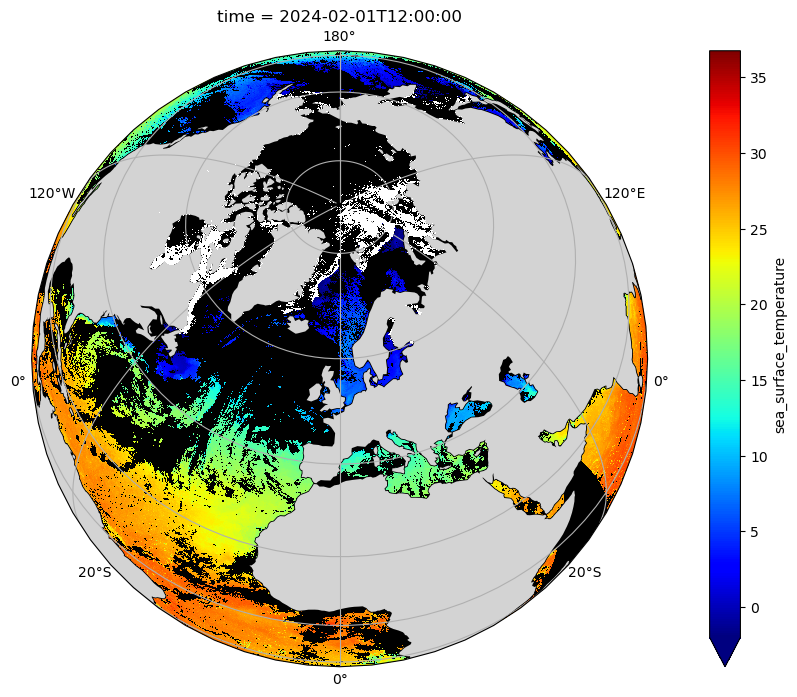

In [12]:
# Loading in the data
desired_date = '20240201'  # YYYYMMDD
desired_time = '120000'  # hhmmss - must be 000000 or 120000

date_obj = datetime.strptime(desired_date, "%Y%m%d")
year = date_obj.year
day_of_year = f"{date_obj.timetuple().tm_yday:03d}"  # Ensure 3-digit format

url = f'https://tds0.ifremer.fr/thredds/dodsC/OSI-201-b-metop_b/{year}/{day_of_year}/{desired_date}{desired_time}-OSISAF-L3C_GHRSST-SSTsubskin-AVHRR_SST_METOP_B_GLB-sstglb_metop01_{desired_date}_{desired_time}-v02.0-fv01.0.nc'
xrds = xr.open_dataset(url)

# Setting up the figure
projection = ccrs.Orthographic(central_longitude=0.0, central_latitude=60.0)
transform = ccrs.PlateCarree()

fig = plt.figure(figsize=(16, 8))
ax = plt.axes(projection=projection)

ax.add_feature(cfeature.OCEAN, zorder=0, facecolor='black')
ax.add_feature(cfeature.LAND, zorder=2, facecolor='lightgrey')
ax.gridlines(draw_labels=True)
ax.coastlines()

sst_celsius = xrds['sea_surface_temperature'] - 273.15
vmin = -2
vmax = sst_celsius.max()
sst_celsius.plot(ax=ax, transform=transform, cmap='jet', vmin=vmin, vmax=vmax, zorder=1)

ice_mask = xrds['sea_ice_fraction'].where(xrds['sea_ice_fraction'] > 0)
# Values range from 0 to 100, so setting the range for the colormap to 100 to 101 will plot everything white
ice_mask.plot(ax=ax, transform=transform, vmin=100, vmax=101, cmap='Greys', add_colorbar=False, zorder=3)

ax.coastlines()
ax.add_feature(cfeature.LAND, facecolor='grey')

plt.savefig(f'sea_water_temperatures.png', transparent=True)
plt.show()

### Zooming in on area of interest

Let's now provide a latitude and longitude range to zoom in on.

If you have an xarray object, for example:

In [13]:
desired_date = '20240201'  # YYYYMMDD
desired_time = '120000'  # hhmmss - must be 000000 or 120000

date_obj = datetime.strptime(desired_date, "%Y%m%d")
year = date_obj.year
day_of_year = f"{date_obj.timetuple().tm_yday:03d}"  # Ensure 3-digit format

url = f'https://tds0.ifremer.fr/thredds/dodsC/OSI-201-b-metop_b/{year}/{day_of_year}/{desired_date}{desired_time}-OSISAF-L3C_GHRSST-SSTsubskin-AVHRR_SST_METOP_B_GLB-sstglb_metop01_{desired_date}_{desired_time}-v02.0-fv01.0.nc'
xrds = xr.open_dataset(url)

Let's first take a subset of that for our desired range

In [14]:
lat_range = slice(-60, 74)
lon_range = slice(-90, 60)
ds_aoi = xrds.sel(lat=lat_range, lon=lon_range)
ds_aoi

<xarray.Dataset> Size: 788MB
Dimensions:                    (time: 1, lat: 2680, lon: 3000)
Coordinates:
  * time                       (time) datetime64[ns] 8B 2024-02-01T12:00:00
  * lat                        (lat) float32 11kB -59.97 -59.92 ... 73.92 73.97
  * lon                        (lon) float32 12kB -89.97 -89.92 ... 59.92 59.97
Data variables: (12/14)
    sea_surface_temperature    (time, lat, lon) float64 64MB ...
    sst_dtime                  (time, lat, lon) timedelta64[ns] 64MB ...
    sses_bias                  (time, lat, lon) float64 64MB ...
    sses_standard_deviation    (time, lat, lon) float64 64MB ...
    dt_analysis                (time, lat, lon) float64 64MB ...
    wind_speed                 (time, lat, lon) float64 64MB ...
    ...                         ...
    adi_dtime_from_sst         (time, lat, lon) float64 64MB ...
    sources_of_adi             (time, lat, lon) float32 32MB ...
    l2p_flags                  (time, lat, lon) int16 16MB ...
    quality_level              (time, lat, lon) float32 32MB ...
    satellite_zenith_angle     (time, lat, lon) float64 64MB ...
    solar_zenith_angle         (time, lat, lon) float64 64MB ...
Attributes: (12/47)
    Conventions:                CF-1.4
    title:                      Sea Surface Temperature
    summary:                    The GLB L3C product derived from METOP B AVHR...
    references:                 Low Earth Orbiter Sea Surface Temperature Pro...
    institution:                OSISAF
    history:                    METEO-FRANCE/CMS LEOSAFO processor
    ...                         ...
    project:                    Group for High Resolution Sea Surface Tempera...
    publisher_name:             The GHRSST Project Office
    publisher_url:              http://www.ghrsst.org
    publisher_email:            ghrsst-po@nceo.ac.uk
    processing_level:           L3C
    cdm_data_type:              grid

We can then proceed to plotting the data as normal.

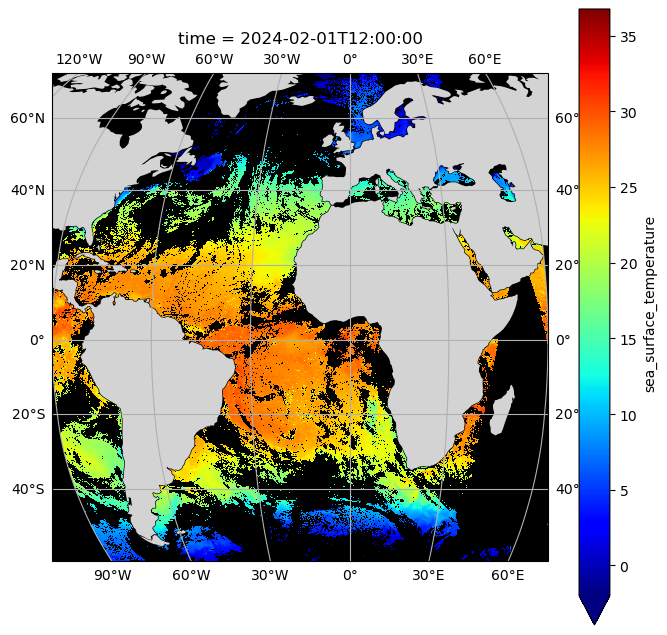

In [15]:
fig = plt.figure(figsize=(8, 8))
projection = ccrs.Robinson()
transform = ccrs.PlateCarree()
ax = plt.axes(projection=projection)

vmin = -2
vmax = sst_celsius.max()
cmap='jet'

ax.add_feature(cfeature.OCEAN, zorder=0, facecolor='black')
ax.add_feature(cfeature.LAND, zorder=2, facecolor='lightgrey')
ax.gridlines(draw_labels=True)
ax.coastlines()

sst_celsius = ds_aoi['sea_surface_temperature'] - 273.15
sst_celsius.plot(
    ax=ax,
    transform=transform,
    vmin=vmin,
    vmax=vmax, 
    cmap=cmap,
    zorder=1
)

plt.show()

### Finding the sea surface temperature at a given location and date

Let's now look at how to find the value for the sea surface temperature at a given location and time. We will using the method `nearest` to find the nearest value to our selected point, though other methods are available.
https://docs.xarray.dev/en/latest/generated/xarray.Dataset.sel.html



In [43]:
import xarray as xr

desired_date = '20240201'  # YYYYMMDD
desired_time = '120000'  # hhmmss - must be 000000 or 120000
desired_latitude = 40
desired_longitude = -12

date_obj = datetime.strptime(desired_date, "%Y%m%d")
year = date_obj.year
day_of_year = f"{date_obj.timetuple().tm_yday:03d}"  # Ensure 3-digit format

url = f'https://tds0.ifremer.fr/thredds/dodsC/OSI-201-b-metop_b/{year}/{day_of_year}/{desired_date}{desired_time}-OSISAF-L3C_GHRSST-SSTsubskin-AVHRR_SST_METOP_B_GLB-sstglb_metop01_{desired_date}_{desired_time}-v02.0-fv01.0.nc'
xrds = xr.open_dataset(url)

sst_value = xrds.sel(
    time = desired_date,
    lat = desired_latitude,
    lon = desired_longitude,
    method = 'nearest'
)['sea_surface_temperature'].values

print(sst_value, xrds['sea_surface_temperature'].attrs['units'])


289.97999999999996 kelvin


We might also want to find out what latitude, longitude and time that value corresponds to.

In [44]:
import xarray as xr

desired_date = '20240201'  # YYYYMMDD
desired_time = '120000'  # hhmmss - must be 000000 or 120000

date_obj = datetime.strptime(desired_date, "%Y%m%d")
year = date_obj.year
day_of_year = f"{date_obj.timetuple().tm_yday:03d}"  # Ensure 3-digit format

url = f'https://tds0.ifremer.fr/thredds/dodsC/OSI-201-b-metop_b/{year}/{day_of_year}/{desired_date}{desired_time}-OSISAF-L3C_GHRSST-SSTsubskin-AVHRR_SST_METOP_B_GLB-sstglb_metop01_{desired_date}_{desired_time}-v02.0-fv01.0.nc'
xrds = xr.open_dataset(url)

single_point = xrds.sel(
    lat = desired_latitude,
    lon = desired_longitude,
    method = 'nearest'
)

latitude_value = single_point['lat'].values
longitude_value = single_point['lon'].values
sst_value = single_point['sea_surface_temperature'].values

print('Latitude:',latitude_value)
print('Longitude:',longitude_value)
print('Sea surface temperature value:',sst_value, xrds['sea_surface_temperature'].attrs['units'])

Latitude: 40.02539
Longitude: -11.974609
Sea surface temperature value: [289.98] kelvin
